# Stock Market Predictions with simple NN and LSTM

![title](https://s.yimg.com/ny/api/res/1.2/eLznomDWWZonxuAgDXirAw--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/http://media.zenfs.com/en-US/homerun/businessinsider.com/a71e3b660df55d68700bce77c22ba270)

そもそも株価は機械学習によって予想すべきものではないとの意見が大きい。   
今回は大量のデータが必要なため、20年分のアップルの株価を予測する。  
Princeton University economist Burton Malkiel, who argues in his 1973 book, "A Random Walk Down Wall Street"

In [1]:
from pandas_datareader import data

import tensorflow as tf
import numpy as np
import pandas as pd

## 1. Import Time-Series Data

In [2]:
import os
import urllib
import json
import pandas as pd
import datetime as dt

In [3]:
api_key = "YN8VZBH1WDWX22FI"
ticker = ".INX"
link = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker, api_key)
file = 'stock_price_%s.csv'%ticker

In [6]:
if not os.path.exists(file):    
    with urllib.request.urlopen(link) as url:
        data =  json.loads(url.read().decode())
        
        data = data["Time Series (Daily)"]
        df = pd.DataFrame(columns = ["Date", "Low", "High", "Close", "Open"])
        
        # ".items()"により、各要素のキーkeyと値valueの両方に対してforループ処理を行う
        for k, v in data.items():
            date = dt.datetime.strptime(k, "%Y-%m-%d")
            data_row = [date.date(), float(v['3. low']), float(v['2. high']), float(v['4. close']), float(v['1. open'])]
            df.loc[-1, :] = data_row
            df.index = df.index + 1
    
    df.to_csv(file)

In [7]:
ls

README.md                    stock_proce_main_code.ipynb
data_stocks.csv              stockprediction/
stock_price_.INX.csv         stockprediction.py
stock_price_AAPL.csv


In [10]:
aaple = pd.read_csv("stock_price_AAPL.csv")
aaple.drop("Unnamed: 0", axis=1, inplace=True)
aaple.head()

,Date,Low,High,Close,Open
0,1999-10-04,62.38,64.87,64.56,62.38
1,2015-03-09,125.06,129.57,127.14,127.96
2,1998-10-22,36.25,37.63,36.75,36.88
3,2006-11-28,89.91,91.97,91.81,90.36
4,2013-12-23,562.76,570.72,570.09,568.00


In [14]:
len(aaple)

5300

In [15]:
aaple.sort_values('Date', inplace=True)
aaple.head()

,Date,Low,High,Close,Open
2786,1998-01-02,13.50,16.25,16.25,13.63
1511,1998-01-05,15.19,16.56,15.88,16.50
2924,1998-01-06,14.75,20.00,18.94,15.94
815,1998-01-07,17.31,19.00,17.50,18.81
3823,1998-01-08,16.94,18.62,18.19,17.44


In [18]:
print(aaple.Close.max())
print(aaple.Close.min())
print(aaple.Close.sum()/len(aaple.Close))

702.1
13.12
158.32273243396227


## 2. Data Visualization

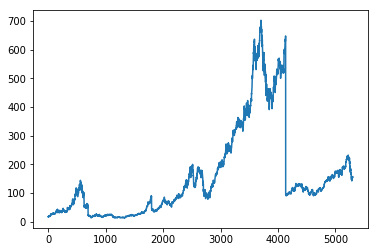

In [23]:
import matplotlib.pyplot as plt
close = np.array(aaple.Close).reshape(len(aaple.Close), 1)
plt.plot(close)
plt.show()

Note : 米国利上げと中国の景気減速への懸念が原因で2015年8月に始まった世界の株式市場の急落

## 3. Scaling & Normalizing the Data 正規化  
  
### スケールが異なる特徴量を均等に扱うための方法
  
### 正規化
正規化は学習データ{x1,...,xN}に対して、値が0〜1の範囲に収まるように加工を施すことです。場合によっては−1〜1にすることもあります。   
方法は単純で、学習データの中で最も大きな値（あるいは最も大きな絶対値）を取り出し、全てのデータをその値で割るだけです。   
    
- fit パラメータ（平均や標準偏差 etc）計算
- transform パラメータをもとにデータ変換
- fit_transform パラメータ計算とデータ変換をまとめて実行

### 標準化  
標準化では入力データDの平均を0, 分散を1にする加工をします.   
多次元データに対してこのような処理が必ず有効であるかは分からない.   
なぜなら、学習データxの各成分の大きさを均等に扱っていいかわからないため.  
画像であれば、すべてピクセルの値（濃淡）であって、対等に扱えるデータの代表.  
一方で各次元が(身長、体重、体脂肪率)などになっていた場合は、成分毎に意味合いが全く異なるため、各成分毎に正規化をする（身長は身長だけで正規化する）ことが必要になるかもしれないということです.

In [25]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
apple_close = scaler.fit_transform(close)

In [26]:
apple_close

array([[0.00454295],
       [0.00400592],
       [0.00844727],
       ...,
       [0.20436007],
       [0.20258933],
       [0.20841461]])

In [105]:
apple_close = apple_close.tolist()

In [107]:
apple_close

[[0.004542947545647193],
 [0.004005921797439697],
 [0.008447269877209791],
 [0.006357223722023863],
 [0.00735870417138379],
 [0.00735870417138379],
 [0.007445789427849868],
 [0.009260065604226542],
 [0.009622920839501874],
 [0.008810125112485127],
 [0.008258585154866615],
 [0.008621440390141951],
 [0.008403727248976752],
 [0.008897210368951206],
 [0.009260065604226542],
 [0.009172980347760464],
 [0.008708525646608033],
 [0.008810125112485127],
 [0.007808644663125201],
 [0.007532874684315946],
 [0.006632993700833121],
 [0.007532874684315946],
 [0.007445789427849868],
 [0.007532874684315946],
 [0.007808644663125201],
 [0.008810125112485127],
 [0.009172980347760464],
 [0.008534355133675873],
 [0.009071380881883369],
 [0.009260065604226542],
 [0.009434236117158702],
 [0.010798571801793957],
 [0.010624401288861801],
 [0.00998577607477721],
 [0.01180005225115388],
 [0.011887137507619962],
 [0.0133385584487213],
 [0.015065749368631896],
 [0.015239919881564059],
 [0.013977183662805887],
 [0.01

## 4. Reshape Splitting Data 
- 特徴:1週間単位
- ターゲット:次の一日

In [108]:
feature, target = [], []
for i in range(0, len(apple_close) - 7):
    # 1週間ごとにする
    feature.append(apple_close[i:i+7])
    target.append(apple_close[i+7])
    
target 

[[0.009260065604226542],
 [0.009622920839501874],
 [0.008810125112485127],
 [0.008258585154866615],
 [0.008621440390141951],
 [0.008403727248976752],
 [0.008897210368951206],
 [0.009260065604226542],
 [0.009172980347760464],
 [0.008708525646608033],
 [0.008810125112485127],
 [0.007808644663125201],
 [0.007532874684315946],
 [0.006632993700833121],
 [0.007532874684315946],
 [0.007445789427849868],
 [0.007532874684315946],
 [0.007808644663125201],
 [0.008810125112485127],
 [0.009172980347760464],
 [0.008534355133675873],
 [0.009071380881883369],
 [0.009260065604226542],
 [0.009434236117158702],
 [0.010798571801793957],
 [0.010624401288861801],
 [0.00998577607477721],
 [0.01180005225115388],
 [0.011887137507619962],
 [0.0133385584487213],
 [0.015065749368631896],
 [0.015239919881564059],
 [0.013977183662805887],
 [0.014514209411013387],
 [0.016430085053267155],
 [0.01587854509564864],
 [0.016430085053267155],
 [0.013977183662805887],
 [0.01587854509564864],
 [0.0188684722343174],
 [0.0201

In [109]:
feature

[[[0.004542947545647193],
  [0.004005921797439697],
  [0.008447269877209791],
  [0.006357223722023863],
  [0.00735870417138379],
  [0.00735870417138379],
  [0.007445789427849868]],
 [[0.004005921797439697],
  [0.008447269877209791],
  [0.006357223722023863],
  [0.00735870417138379],
  [0.00735870417138379],
  [0.007445789427849868],
  [0.009260065604226542]],
 [[0.008447269877209791],
  [0.006357223722023863],
  [0.00735870417138379],
  [0.00735870417138379],
  [0.007445789427849868],
  [0.009260065604226542],
  [0.009622920839501874]],
 [[0.006357223722023863],
  [0.00735870417138379],
  [0.00735870417138379],
  [0.007445789427849868],
  [0.009260065604226542],
  [0.009622920839501874],
  [0.008810125112485127]],
 [[0.00735870417138379],
  [0.00735870417138379],
  [0.007445789427849868],
  [0.009260065604226542],
  [0.009622920839501874],
  [0.008810125112485127],
  [0.008258585154866615]],
 [[0.00735870417138379],
  [0.007445789427849868],
  [0.009260065604226542],
  [0.0096229208395

In [111]:
feature[0]

[[0.004542947545647193],
 [0.004005921797439697],
 [0.008447269877209791],
 [0.006357223722023863],
 [0.00735870417138379],
 [0.00735870417138379],
 [0.007445789427849868]]

In [113]:
target[0]

[0.009260065604226542]

In [114]:
MAX_LEN = len(feature)

In [156]:
feature = np.reshape(np.array(feature), (MAX_LEN, 7, 1))

In [157]:
target = np.reshape(np.array(target), (MAX_LEN, 1))

In [169]:
target.min()

0.0

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(feature, target, test_size=0.2)

In [159]:
x_train.shape

(4234, 7, 1)

In [160]:
y_val.shape

(1059, 1)

## 5. Modeling LSTM

In [148]:
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Input
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [191]:
inputs = Input(shape=(7, 1))
lstm_layer = LSTM(300, activation='relu')(inputs)
dense_layer = Dense(1, activation='linear')(lstm_layer)
outputs = Dense(1, activation='sigmoid')(dense_layer)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss="mape", optimizer="RMSprop", metrics=["accuracy"])

In [192]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 7, 1)              0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 300)               362400    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 301       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
Total params: 362,703
Trainable params: 362,703
Non-trainable params: 0
_________________________________________________________________


In [193]:
history = model.fit(x_train,
                     y_train,
                     batch_size=32,
                     epochs=8,
                     validation_data=[x_val, y_val])

Train on 4234 samples, validate on 1059 samples
Epoch 1/8
4234/4234 [==============================] - 8s 2ms/step - loss: 192.3500 - acc: 2.3618e-04 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 2/8
4234/4234 [==============================] - 5s 1ms/step - loss: 99.9764 - acc: 2.3618e-04 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 3/8
4234/4234 [==============================] - 4s 982us/step - loss: 99.9764 - acc: 2.3618e-04 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 4/8
4234/4234 [==============================] - 5s 1ms/step - loss: 99.9764 - acc: 2.3618e-04 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 5/8
4234/4234 [==============================] - 5s 1ms/step - loss: 99.9764 - acc: 2.3618e-04 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 6/8
4234/4234 [==============================] - 5s 1ms/step - loss: 99.9764 - acc: 2.3618e-04 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 7/8
4234/4234 [==============================] - 5s 1ms/step - loss: 99.9764 - 

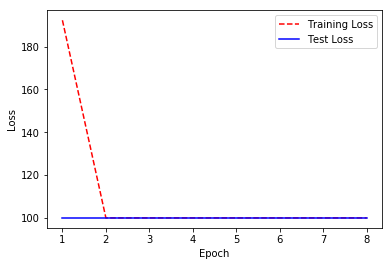

In [194]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

データ数が少なくうまく学習できていないのか